<a href="https://colab.research.google.com/github/jpatata/censusdata_white_black/blob/main/Final_Capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this analysis, we will be looking at the "Current Population Survey, 2020 Annual Social and Economic (ASEC) Supplement" conducted by the Bureau of the Census for the Bureau of Labor Statistics.

##Importance of the Census Data

The Census data helps determine how much funding the federal governments allocate to state governments and local communities, including programs that benefit lower-income families such as Medicaid, special education grants, and more.

Source: [New York Times](https://https://www.nytimes.com/2018/03/27/us/politics/census-citizenship-question.html), [Population Reference Bureau](https://https://www.prb.org/importance-of-us-census/)

##Objective
This analysis takes a closer look at differences between the White and Black communities concerning factors such as education, income, health care, and more. These insights could help federal governments decide where to allocate funds to address existing issues in black communities.


# Data

##Dataset Description

This analysis uses the "Person (SAS/CSV)" record type which originally has  157,959 rows and 840 columns of which 12 columns are chosen for the statistical analyses. 

Except for one column, all columns are integers. Two columns contain continuous variables, while the others contain categorical variables.

In addition, the analyses only look at data for race White and Black in the race column. Using this modified dataset, eight statistical tests are conducted to assess whether race (White and Black) affects:

* Receiving financial assistance<br>
* Poverty level<br>
* Having health insurance coverage<br>
* Health status<br>
* Receiving medicaid<br>
* Educational attainment<br>
* Employment status<br>
* Income<br>

and two statistical tests to assess whether<br> 
* Education affects poverty level<br>
* Poverty level affects health status

Statistical tests run in this analysis:<br>
* Chi-Square test<br>
* Cramér's V<br>
* Welch's t-test<br>
which will be further explained in their respective sections.

Source:<br> 
[Datasets and Technical Documentation](https://www.census.gov/content/census/en/data/datasets/2020/demo/cps/cps-asec-2020.html) 

# Exploratory Data Analysis 

In [ ]:
#import all the libraries needed for analysis

import numpy as np
import pandas as pd

#To look at the list of csv files behind the zip and extract the desired csv
from io import BytesIO
from zipfile import ZipFile
import urllib.request

#for statistical analyses
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Chi-Square Test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as scis

#for creating histograms
import seaborn as sns
sns.set()

#levene test
from scipy.stats import levene

# log-normal distribution
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot as plt

#for creating bar charts
import plotly.express as px

In [ ]:
#there is more than one csv file in the zip link, so first I want to see what the csv names are
    
url = urllib.request.urlopen("https://www2.census.gov/programs-surveys/cps/datasets/2020/march/asecpub20csv.zip")

with ZipFile(BytesIO(url.read())) as my_zip_file:
    for contained_file in my_zip_file.namelist():
            print(contained_file)
            # output.write(line)

hhpub20.csv
ffpub20.csv
pppub20.csv
asec_csv_repwgt_2020.csv


In [ ]:
#look into one of the csv files to see how many columns, etc., there are. 
#first, need to write a function
def fetch_multi_csv_zip_from_url(url, filenames=(), *args, **kwargs):
    assert kwargs.get('compression') is None
    req = urlopen(url)
    zip_file = zipfile.ZipFile(BytesIO(req.read()))

    if filenames:
        names = zip_file.namelist()
        for filename in filenames:
            if filename not in names:
                raise ValueError(
                    'filename {} not in {}'.format(filename, names))
    else:
        filenames = zip_file.namelist()

    return {name: pd.read_csv(zip_file.open(name), *args, **kwargs)
            for name in filenames}

In [ ]:
#open the file
try:
    from urllib.request import urlopen
except ImportError:
    from urllib2 import urlopen

from io import BytesIO
import zipfile

master_links = [
    'https://www2.census.gov/programs-surveys/cps/datasets/2020/march/asecpub20csv.zip']

df1 = fetch_multi_csv_zip_from_url(master_links[0])
print(df1['pppub20.csv'])

                      PERIDNUM  PH_SEQ  P_SEQ  ...  FILEDATE  FILESTAT  YYYYMM
0       8329611509015080901101       1      1  ...     91820         2  202003
1       8329611509015080901102       1      2  ...     91820         2  202003
2       4238996011902050901101       2      1  ...     91820         2  202003
3       4238996011902050901102       2      2  ...     91820         2  202003
4       2059506120093750901101       3      1  ...     91820         5  202003
...                        ...     ...    ...  ...       ...       ...     ...
157954  7515211700027251111101   91498      1  ...     91820         5  202003
157955  7515211700027251111103   91498      2  ...     91820         5  202003
157956  5604003644112011111101   91499      1  ...     91820         6  202003
157957  1221006170965901111101   91500      1  ...     91820         4  202003
157958  1221006170965901111102   91500      2  ...     91820         6  202003

[157959 rows x 840 columns]


In [ ]:
#pull the data of the csv into pandas to be able to manipulate and work on it
url = urlopen("https://www2.census.gov/programs-surveys/cps/datasets/2020/march/asecpub20csv.zip")

#download zipfile and create pandas dataframe
zipfile = ZipFile(BytesIO(url.read()))
df1 = pd.read_csv(zipfile.open('pppub20.csv'))

In [ ]:
df1.head()

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,PXRRP,PXMARITL,PXRACE1,PEHSPNON,PXHSPNON,PEAFEVER,PXAFEVER,PEAFWHN1,PXAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXSPOUSE,PENATVTY,PXNATVTY,PEMNTVTY,PXMNTVTY,PEFNTVTY,PXFNTVTY,PEINUSYR,PXINUSYR,PEPAR1,PXPAR1,PEPAR2,PXPAR2,PEPAR1TYP,PXPAR1TYP,PEPAR2TYP,PXPAR2TYP,PRDASIAN,...,TOI_VAL,TTRDINT_VAL,TRINT_VAL1,TRINT_VAL2,TRNT_VAL,TCAP_VAL,TDIV_VAL,TCSP_VAL,TED_VAL,TCHSP_VAL,TPHIP_VAL,TPHIP_VAL2,TPMED_VAL,TPOTC_VAL,TPEMCPREM,TCERNVAL,TCWSVAL,TCSEVAL,TCFFMVAL,TSURVAL1,TSURVAL2,TDISVAL1,TDISVAL2,TAX_ID,PEIOIND,PEIOOCC,A_WERNTF,A_HERNTF,I_DISVL1,I_DISVL2,I_SURVL1,I_SURVL2,MIG_CBST,MIG_DSCP,M5G_CBST,M5G_DSCP,DEP_STAT,FILEDATE,FILESTAT,YYYYMM
0,8329611509015080901101,1,1,1,1,1,0,0,0,40,0,0,0,2,0,2,0,-1,1,-1,-1,-1,0,57,0,57,0,57,0,0,0,-1,1,-1,1,-1,1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,9480,440,0,0,0,0,0,0,0,0,0,0,0,91820,2,202003
1,8329611509015080901102,1,2,2,1,1,0,0,0,42,0,0,0,2,0,2,0,-1,1,-1,-1,-1,0,57,0,57,0,57,0,0,0,-1,1,-1,1,-1,1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,0,-1,0,0,0,0,0,0,0,0,0,0,0,91820,2,202003
2,4238996011902050901101,2,1,1,1,1,0,0,0,40,0,0,0,2,0,1,0,2,0,3,-1,-1,0,57,0,57,0,57,0,0,0,-1,1,-1,1,-1,1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201,7860,9121,0,0,0,0,0,0,0,0,0,0,0,91820,2,202003
3,4238996011902050901102,2,2,2,1,1,0,0,0,42,0,0,0,2,0,2,0,-1,1,-1,-1,-1,0,57,0,57,0,57,0,0,0,-1,1,-1,1,-1,1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201,0,-1,0,0,0,0,0,0,0,0,0,0,0,91820,2,202003
4,2059506120093750901101,3,1,1,1,1,0,0,0,41,0,0,0,2,0,2,0,-1,1,-1,-1,-1,1,57,0,57,0,57,0,0,0,-1,1,-1,1,-1,1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,301,6290,5500,0,0,0,0,0,0,0,0,0,0,0,91820,5,202003


In [ ]:
#select the columns to work with in this analysis
df1_select=df1[['PERIDNUM','PRDTRACE','AGE1','FIN_YN','PERLIS','COV','HEA','CAID','A_HGA','A_EXPLF','PEMLR','PTOT_R']].copy()

In [ ]:
df1_select.head()

,PERIDNUM,PRDTRACE,AGE1,FIN_YN,PERLIS,COV,HEA,CAID,A_HGA,A_EXPLF,PEMLR,PTOT_R
0,8329611509015080901101,1,14,2,4,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,2,2,39,1,1,17


In [ ]:
#get an overview of row and column numbers
df1_select.shape

(157959, 12)

In [ ]:
df1_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157959 entries, 0 to 157958
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   PERIDNUM  157959 non-null  object
 1   PRDTRACE  157959 non-null  int64 
 2   AGE1      157959 non-null  int64 
 3   FIN_YN    157959 non-null  int64 
 4   PERLIS    157959 non-null  int64 
 5   COV       157959 non-null  int64 
 6   HEA       157959 non-null  int64 
 7   CAID      157959 non-null  int64 
 8   A_HGA     157959 non-null  int64 
 9   A_EXPLF   157959 non-null  int64 
 10  PEMLR     157959 non-null  int64 
 11  PTOT_R    157959 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 14.5+ MB


In [ ]:
#see if there are any NaN values
df1_select.isnull().sum()

PERIDNUM    0
PRDTRACE    0
AGE1        0
FIN_YN      0
PERLIS      0
COV         0
HEA         0
CAID        0
A_HGA       0
A_EXPLF     0
PEMLR       0
PTOT_R      0
dtype: int64

In [ ]:
#rename the columns
df1_select = df1_select.rename(columns = 
{"PERIDNUM":"ID",
  "PRDTRACE":"race", 
 "FIN_YN":"financial_assistance",
 "PERLIS":"poverty_level",
 "COV":"health_insurance",
 "HEA":"health_status",
 "CAID":"medicaid_coverage",
 "A_HGA": "ed_attainment",  
 "A_EXPLF":"employment_status",
 "PEMLR":"labor_force_recode",
 "PTOT_R":"total_income_recode",
})

In [ ]:
df1_select.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,2,2,39,1,1,17


#Statistical Analyses for the Categorical Variables

##Chi-Square Test and Cramér's V

###Chi-Square Test

The Chi-square test is a non-parametric statistic and is used in this case because:

1. The level of measurement of all the variables is nominal or ordinal.

2. The sample sizes of the study groups are unequal.

3. The original data violates the following assumptions of a parametric test:

  * Skewed or kurtotic distribution of the data

  * Violation of the assumption of equal variance or homoscedasticity.

###Cramér's V

Useful for comparing multiple X2 test statistics.<br>
Because it is not affected by sample size, it can be used to test whether a significant chi-square was the result of a large sample size.<br>
The coefficient ranges from 0 to 1 (perfect association).

There is no absolute interpretation of an effect size statistic like Cramér's V. It is always relative to the discipline and the expectations of the experiment.


## Chi-Square Test and Cramér's V for Financial Assistance and Race (White and Black)

Null Hypothesis: "There is no effect of race on receiving financial assistance".<br>
Alternative Hypothesis: "There is an effect of race on receiving financial assistance".

In [ ]:
#only work with race White and Black, White=1, Black=2
race1 = df1_select[(df1_select['race'].isin([1, 2]))]

In [ ]:
#eliminate persons aged 19 and under [1-3 includes ages 15-19]
#do this to have more effective results, especially when looking at effects of race on education, education on employment, etc.
#for example, a person that is 15yo will not have a high school diploma yet 
race = race1.drop(race1.loc[race1['AGE1']<=3].index)

In [ ]:
#how many rows are there for White and Black
#a large amount of data for White over all other races in this data set
race['race'].value_counts()

1    88082
2    13451
Name: race, dtype: int64

In [ ]:
#to exclude 0=niu (not in universe)
race_finance= race[(race['financial_assistance'].isin([1,2]))]

In [ ]:
race_finance['financial_assistance'].value_counts()

2    100631
1       902
Name: financial_assistance, dtype: int64

In [ ]:
#create a crosstab for the chi-square analysis
race_finance_crosstab = pd.crosstab(race_finance['financial_assistance'],  
                            race_finance['race'],
                                margins = False) 

In [ ]:
print(race_finance_crosstab)

race                      1      2
financial_assistance              
1                       740    162
2                     87342  13289


In [ ]:
def chi_square(crosstab):
  """Chi-square test of independence of variables in a contingency table. 
  Returns: degrees of freedom, expected frequencies, probability, critical value, and chi-square. 
  Tests significance of chi-square and p-value.

  Cramér's V:
  To test whether significant chi-square might have been due to sample size.
  Measure of association between two nominal variables.
  Returns a value between 0 and +1."""

  #contingency table
  chi_square, pvalue, degrees_of_freedom, expected_frequencies = chi2_contingency(crosstab) 
  print("\033[1m" + 'Chi-Square Test' + "\033[0m") # to have text in bold
  print('degrees of freedom = %d' % degrees_of_freedom) #%d to truncate float
  print("\n"'Expected frequencies:\n', expected_frequencies)
     
  #interpret p-value
  alpha = 0.05
  print("\n" 'alpha=%.3f, p-value=%.3f' % (alpha, pvalue))
  if pvalue <= alpha:
	  print('p-value <= 0.05. Reject H0 that there is no association between the two variables.')
  else:
	  print('p-value > 0.05. Fail to reject H0 that there is no association between the two variables.')
  
   #cramer's v table
  n = np.sum(crosstab) #number of the times the values were observed, which can be found in the crosstab

  v = np.sqrt(chi_square / (n * (np.minimum(crosstab.shape[0], crosstab.shape[1]) - 1)))
    #cramer's v is computed by taking the square root of the chi-squared statistic divided by the sample size and the minimum dimension minus 1
    #shape[0] is number of columns
    #shape[1] is number of rows
    #np.minimum compares two arrays (here crosstab.shape[0] and crosstab.shape[1]) and returns a new array containing the element-wise minima
    #multiply the result is by n and then subtract 1
    #divide the result by chi2
    #finally take the square root
  
  print("\n"+"\033[1m" + 'Cramer\'s V for: ' + "\033[0m" + "\n" + '{}'.format(v))
  

In [ ]:
chi_square(race_finance_crosstab)

Chi-Square Test
degrees of freedom = 1

Expected frequencies:
 [[  782.50385589   119.49614411]
 [87299.49614411 13331.50385589]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.013963
2    0.035730
dtype: float64


###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of race on receiving financial assistance

White showed a lesser incidence of receiving financial assistance and greater incidence of not receiving financial assistance than expected by chance alone.

Black showed a greater incidence of receiving financial assistance and lesser incidence of not receiving financial assistance than expected by chance alone.

###Cramér's V Interpretation

The results suggest that chi-square could be statistically significant due to the large sample size. These results will thus not be taken into account.


### Visualization

In [ ]:
#replace numbers with the value for the bar chart
race_finance['financial_assistance'] = race_finance['financial_assistance'].replace([1,2],['Yes','No'])

In [ ]:
race_finance.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,No,4,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,No,4,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,No,4,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,No,4,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,No,4,1,2,2,39,1,1,17


In [ ]:
def dataframe(data, column):
  """Creating a bar chart to visualize the data:
  Change labels for the race column to always show White and Black instead of 1 and 2 in the legend. 
  Normalize data for the chosen column to show percentages on the y-axis.
  Create the bar chart via plotly."""

#race is part of every calculation - change 1,2 with White,Black to show in legend
  data['race'] = data['race'].replace([1,2],['white','black']) 

#normalize data to emphasize difference between White and Black independent from sample size difference
  name = (data.groupby(['race'])[column]  
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)#show 0-100% instead of 0-1.0
                .reset_index())#To add percentage as a column

  
  #plot data in bar chart via plotly 
  fig = px.bar(name, x=column, y='percentage', color='race', barmode='group', height=600, width=800)
  fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')#show the pecentage on top of each bar with max 2 decimals 

  return fig.show()

**Note on Plotly graphs in this document:**

- You can hover over thge Plotly graphs to see more information 
- If the image is not shown correctly, please reload the cell with the function to refresh the chart 

In [ ]:
#run the above function to display the plotly bar chart
dataframe(race_finance,'financial_assistance')

## Chi-Square Test and Cramér's V for Poverty Level and Race (White and Black)

Null Hypothesis: "There is no effect of race on poverty level".<br>
Alternative Hypothesis: "There is an effect of race on poverty level".

In [ ]:
#exclude -1 = NOT IN POVERTY UNIVERSE
poverty = race[(race['poverty_level'].isin([1,2,3,4]))] 

In [ ]:
poverty['poverty_level'].value_counts()

4    84833
1     9504
3     3633
2     3563
Name: poverty_level, dtype: int64

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_poverty_crosstab = pd.crosstab(poverty['poverty_level'],  
                            poverty['race'],
                                margins = False) 

In [ ]:
print(race_poverty_crosstab)

race               1     2
poverty_level             
1               7230  2274
2               2831   732
3               3021   612
4              75000  9833


In [ ]:
#run chi-square and cramer's v function
chi_square(race_poverty_crosstab)

Chi-Square Test
degrees of freedom = 3

Expected frequencies:
 [[ 8244.91867669  1259.08132331]
 [ 3090.97698285   472.02301715]
 [ 3151.70344617   481.29655383]
 [73594.40089429 11238.59910571]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.123876
2    0.316997
dtype: float64


###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of race on poverty level<br>

White shows a lesser incidence of being below the poverty level, at 100 - 124% of the poverty level, and 125 - 149% of the poverty level.<br>
White shows a greater incidence of being at 150 and above the poverty level.<br>

Black shows a greater incidence of being below the poverty level, at 100 - 124% of the poverty level and 125 - 149% of the poverty level.<br>
Black shows show a lesser incidence of being at 150 and above the poverty level.<br>

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size.<br>
The Cramér's V for White suggests a low association.<br>
The Cramér's V for Blacks suggests a moderate association.

### Visualization

In [ ]:
#replace numbers with the value for the bar chart
poverty['poverty_level'] = poverty['poverty_level'].replace([1,2,3,4],['BELOW POVERTY LEVEL','100-124% OF THE POVERTY LEVEL','125-149% OF THE POVERTY LEVEL','150 AND ABOVE THE POVERTY LEVEL'])

In [ ]:
poverty.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,150 AND ABOVE THE POVERTY LEVEL,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,150 AND ABOVE THE POVERTY LEVEL,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,150 AND ABOVE THE POVERTY LEVEL,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,150 AND ABOVE THE POVERTY LEVEL,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,150 AND ABOVE THE POVERTY LEVEL,1,2,2,39,1,1,17


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(poverty,'poverty_level')

## Chi-Square Test and Cramér's V for Health Insurance Coverage and Race (White and Black) 



Null Hypothesis is: "There is no effect of race on having health insurance coverage".<br>
Alternative Hypothesis: "There is an effect of race on having health insurance coverage".

In [ ]:
#exclude 0=Infant born after calendar year
coverage = race[(race['health_insurance'].isin([1, 2]))]


In [ ]:
coverage['health_insurance'].value_counts()

1    92942
2     8591
Name: health_insurance, dtype: int64

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_coverage_crosstab = pd.crosstab(coverage['health_insurance'],  
                            coverage['race'],
                                margins = False) 

In [ ]:
print(race_coverage_crosstab)

race                  1      2
health_insurance              
1                 80764  12178
2                  7318   1273


In [ ]:
#run chi-square and cramer's v function
chi_square(race_coverage_crosstab)

Chi-Square Test
degrees of freedom = 1

Expected frequencies:
 [[80629.12790915 12312.87209085]
 [ 7452.87209085  1138.12790915]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.015060
2    0.038538
dtype: float64


###Chi-Square Interpretation

Reject Null Hypothesis that there is no effect of race on having health insurance coverage<br>

White has a greater incidence of having health insurance coverage.<br>
White has a lesser incidence of not having health insurance coverage.<br>

Black has lesser incidence of having health insurance coverage.<br>
Black has greater incidence of not having health insurance coverage. 

###Cramér's V Interpretation

The result suggests that chi-square could be statistically significant due to the large sample size. These results will thus not be taken into account.

### Visualization

In [ ]:
#replace numbers with the value for the bar chart
coverage['health_insurance'] = coverage['health_insurance'].replace([1,2],['Yes','No'])

In [ ]:
coverage.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,Yes,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,Yes,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,Yes,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,Yes,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,Yes,2,2,39,1,1,17


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(coverage,'health_insurance')

## Chi-Square Test and Cramér's V for Health Status and Race (White and Black) 

Null Hypothesis: "There is no effect of race on health status".<br>
Alternative Hypothesis: "There is an effect of race on health status".

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_health_crosstab = pd.crosstab(race['health_status'],  
                            race['race'],
                                margins = False)

In [ ]:
print(race_health_crosstab)

race               1     2
health_status             
1              22951  2720
2              30365  3781
3              23767  4268
4               8191  2009
5               2808   673


In [ ]:
#run chi-square and cramer's v function
chi_square(race_health_crosstab)

Chi-Square Test
degrees of freedom = 4

Expected frequencies:
 [[22270.12914028  3400.87085972]
 [29622.3688062   4523.6311938 ]
 [24320.9485586   3714.0514414 ]
 [ 8848.71322624  1351.28677376]
 [ 3019.84026868   461.15973132]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.099617
2    0.254918
dtype: float64


###Chi-Square Interpretation

Reject Null Hypothesis that there is no effect of race on health status

White has a greater incidence of excellent and very good health health.<br>
White has a lesser incidence of good health, fair, and poor health.<br>

Black has a lesser incidence of excellent and very good health.<br>
Black has a greater incidence of good, fair, and poor health.<br>

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size.<br>
The Cramér's V for White is just under 0.1, which signifies little or no association.<br>
However, for Black, Carmer's V is over 0.2, signifying a low association.

###Visualization

In [ ]:
#create a copy so the actual dataframe won't change
race_copy = race.copy()

In [ ]:
race_copy.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,2,2,39,1,1,17


In [ ]:
#replace numbers with the value for the bar chart
race_copy['health_status'] = race_copy['health_status'].replace([1,2,3,4,5],['Excellent','Very good','Good','Fair','Poor'])

In [ ]:
race_copy.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,Good,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,Good,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,Good,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,Good,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,Very good,2,39,1,1,17


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(race_copy,'health_status')

## Chi-Square Test and Cramér's V for Medicaid and Race (White and Black)

Null Hypothesis: "There is no effect of race on receiving Medicaid".<br>
Alternative Hypothesis: "There is an effect of race on receiving Medicaid".

In [ ]:
#exclude 0=Infant born after calendar year
medicaid = race[(race['medicaid_coverage'].isin([1,2]))]

In [ ]:
medicaid.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,2,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,2,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,3,2,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,2,2,39,1,1,17


In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_medicaid_crosstab = pd.crosstab(medicaid['medicaid_coverage'],  
                            medicaid['race'], margins = False)
print(race_medicaid_crosstab)

race                   1      2
medicaid_coverage              
1                   9527   2695
2                  78555  10756


In [ ]:
#run chi-square and cramer's v function
chi_square(race_medicaid_crosstab)

Chi-Square Test
degrees of freedom = 1

Expected frequencies:
 [[10602.84049521  1619.15950479]
 [77479.15950479 11831.84049521]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.103079
2    0.263776
dtype: float64


###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of race on receiving Medicaid

White has a lesser incidence of Medicaid coverage and a greater incidence of no Medicaid coverage.<br>
Black has a greater incidence of Medicaid coverage and a lesser incidence of no Medicaid coverage.

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size.<br>
The Cramér's V for White signifies low and for Black low to a moderate association.

###Visualization

In [ ]:
#replace numbers with the value for the bar chart
medicaid['medicaid_coverage'] = medicaid['medicaid_coverage'].replace([1,2],['Yes','No'])

In [ ]:
medicaid.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,No,39,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,No,39,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,No,39,1,1,18
3,4238996011902050901102,1,16,2,4,1,3,No,36,0,5,9
4,2059506120093750901101,1,11,2,4,1,2,No,39,1,1,17


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(medicaid, 'medicaid_coverage')

## Chi-Square Test and Cramér's V for Educational Attainment and Race (White and Black)

Null Hypothesis: "There is no effect of race on the level of educational attainment".<br>
Alternative Hypothesis: "There is an effect on the level of educational attainment".

In [ ]:
#to only include those with "12thgrade no diploma" and higher
ed_attainment = race[(race['ed_attainment'].isin([38, 39, 40, 41, 42, 43, 44, 45, 46]))]

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_edattainment_crosstab = pd.crosstab(ed_attainment['ed_attainment'],  
                            ed_attainment['race'], margins = False)

In [ ]:
print(race_edattainment_crosstab)

race               1     2
ed_attainment             
38               985   266
39             24300  4486
40             15030  2627
41              4194   543
42              5584   759
43             19604  2213
44              8478  1015
45              1285   125
46              1700   159


In [ ]:
#run chi-square and cramer's v function
chi_square(race_edattainment_crosstab)

Chi-Square Test
degrees of freedom = 8

Expected frequencies:
 [[ 1087.6046833    163.3953167 ]
 [25026.20976294  3759.79023706]
 [15350.78808394  2306.21191606]
 [ 4118.29207417   618.70792583]
 [ 5514.52958127   828.47041873]
 [18967.44314591  2849.55685409]
 [ 8253.10252483  1239.89747517]
 [ 1225.83741283   184.16258717]
 [ 1616.19273082   242.80726918]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.083786
2    0.216166
dtype: float64


###Chi-Square Interpretation
Reject Null Hypothesis that there is no effect of race on level of educational attainment

White has a lesser incidence for 12th grade no diploma, High school graduate, and some college but no degree.<br>
White has a greater incidence for Associate degrees in college (occupation and academic program), Bachelor's, Master's, Professional school, and Doctorate degree.

Black has a greater incidence for 12th grade no diploma, High school graduate, and some college but no degree.<br>
Black has a lesser incidence for Associate degrees in college (occupation and academic program), Bachelor's, Master's, Professional school, and Doctorate degree.

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size. While Cramér's V for White is just at 0.08, which signifies little or no association, the Cramér's V for Black is over 0.2, implying low association.

###Visualization

In [ ]:
#replace numbers with the value for the bar chart
ed_attainment['ed_attainment'] = ed_attainment['ed_attainment'].replace([38,39,40,41,42,43,44,45,46],['12th grade, no diploma','High School','Some college; no degree','Assoc. degree college - occupation program','Assoc. degree - academic program','Bachelor\'s','Master\'s','Professional school degree','Doctorate'])

In [ ]:
ed_attainment.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,High School,1,1,22
1,8329611509015080901102,1,15,2,4,1,3,2,High School,0,5,30
2,4238996011902050901101,1,14,2,4,1,3,2,High School,1,1,18
4,2059506120093750901101,1,11,2,4,1,2,2,High School,1,1,17
5,1410320300969990901101,1,16,2,1,1,5,2,High School,0,6,1


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(ed_attainment, 'ed_attainment')

## Chi-Square Test and Cramér's V for Employment Status and Race (White and Black)

Null Hypothesis: "There is no effect of race on employment status".<br>
Alternative Hypothesis: "There is an effect of on employment status".

In [ ]:
#exclude 0 = Not in experienced labor force 
emp_stat = race[(race['employment_status'].isin([1,2]))]

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_empstat_crosstab = pd.crosstab(emp_stat['employment_status'],  
                            emp_stat['race'], margins = False)
print(race_empstat_crosstab)

race                   1     2
employment_status             
1                  55001  7367
2                   2389   564


In [ ]:
#run chi-square and cramer's v function
chi_square(race_empstat_crosstab)

Chi-Square Test
degrees of freedom = 1

Expected frequencies:
 [[54795.54079086  7572.45920914]
 [ 2594.45920914   358.54079086]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.049333
2    0.132705
dtype: float64


###Chi-Square Interpretation

Reject Null Hypothesis that there is no effect of race on employment status<br>

White has a greater incidence of being employed and a lesser incidence of being unemployed.<br>
Black has a greater incidence of being unemployed and a lesser incidence of being employed.

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size for Black, with low association.
However, for White, Cramér's V is very low, signifying little if any association and could be due to sample size.

###Visualization

In [ ]:
#replace numbers with the value for the bar chart
emp_stat['employment_status'] = emp_stat['employment_status'].replace([1,2],['Employed','Unemployed'])

In [ ]:
emp_stat.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,39,Employed,1,22
2,4238996011902050901101,1,14,2,4,1,3,2,39,Employed,1,18
4,2059506120093750901101,1,11,2,4,1,2,2,39,Employed,1,17
6,1410320300969990901102,1,8,2,1,1,3,1,39,Employed,1,4
8,2101059322002430901102,1,9,2,4,1,2,2,40,Employed,1,24


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(emp_stat,'employment_status')

## Chi-Square Test and Cramér's V for Employment Status Extended and Race (White and Black) 

Null Hypothesis: "There is no effect of race on employment status (extended)".<br>
Alternative Hypothesis: "There is an effect of race on employment status (extended)".

In [ ]:
#exclude 0 = NIU
emp_stat_ext = race[(race['labor_force_recode'].isin([1,2,3,4]))]

In [ ]:
#create crosstab for chi-square and cramer's v calculation
race_empstatext_crosstab = pd.crosstab(emp_stat_ext['labor_force_recode'],  
                            emp_stat_ext['race'], margins = False)
print(race_empstatext_crosstab)

race                    1     2
labor_force_recode             
1                   52641  7075
2                    2360   292
3                    1093   180
4                    1339   407


In [ ]:
#run chi-square and cramer's v function
chi_square(race_empstatext_crosstab)

Chi-Square Test
degrees of freedom = 3

Expected frequencies:
 [[52451.84865493  7264.15134507]
 [ 2329.3975255    322.6024745 ]
 [ 1118.14594644   154.85405356]
 [ 1533.60787312   212.39212688]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.061407
2    0.165008
dtype: float64


###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of race on employment status (extended)

White has a greater incidence of employed (at work) and employed (absent).<br>
White has a lesser incidence of unemployed (on layoff) and unemployed (looking).

Black has a greater incidence of unemployed (on layoff) and unemployed (looking).<br>
Black has a lesser incidence of employed (at work) and employed (absent).

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size for Black, with a low association.
However, for White, Cramér's V is low, signifying little if any association and could be due to sample size.

###Visualization

In [ ]:
#replace numbers with the value for the bar chart
emp_stat_ext['labor_force_recode'] = emp_stat_ext['labor_force_recode'].replace([1,2,3,4],['Employed - at work','Employed - absent','Unemployed - on layoff','Unemployed - Looking'])

In [ ]:
emp_stat_ext.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode
0,8329611509015080901101,1,14,2,4,1,3,2,39,1,Employed - at work,22
2,4238996011902050901101,1,14,2,4,1,3,2,39,1,Employed - at work,18
4,2059506120093750901101,1,11,2,4,1,2,2,39,1,Employed - at work,17
6,1410320300969990901102,1,8,2,1,1,3,1,39,1,Employed - at work,4
8,2101059322002430901102,1,9,2,4,1,2,2,40,1,Employed - at work,24


In [ ]:
#run normalizing data and plotly bar chart function
dataframe(emp_stat_ext,'labor_force_recode')

## Chi-Square Test and Cramér's V for Education and Employment Status (for White and Black)

Null Hypothesis: "There is no effect of education on employment status".<br>
Alternative Hypothesis: "There is an effect of education on employment status".

In [ ]:
#Create crosstab for chi-square and cramer's v calculation
education_employment_crosstab = pd.crosstab(emp_stat['employment_status'], ed_attainment['ed_attainment'],  
                             margins = False)

In [ ]:
education_employment_crosstab.head()

ed_attainment,"12th grade, no diploma",Assoc. degree - academic program,Assoc. degree college - occupation program,Bachelor's,Doctorate,High School,Master's,Professional school degree,Some college; no degree
employment_status,,,,,,,,,
Employed,624,4233,3171,15596,1370,15809,6842,1057,10340
Unemployed,58,180,128,478,26,1008,160,20,577


In [ ]:
#run chi-square and cramer's v function
chi_square(education_employment_crosstab)

Chi-Square Test
degrees of freedom = 8

Expected frequencies:
 [[  652.86320671  4224.465295    3158.05823889 15387.27739676
   1336.35929115 16098.53452665  6702.85655917  1030.98779123
  10450.59769444]
 [   29.13679329   188.534705     140.94176111   686.72260324
     59.64070885   718.46547335   299.14344083    46.01220877
    466.40230556]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
ed_attainment
12th grade, no diploma                        0.716235
Assoc. degree - academic program              0.281566
Assoc. degree college - occupation program    0.325654
Bachelor's                                    0.147532
Doctorate                                     0.500616
High School                                   0.144236
Master's                                      0.223530
Professional school degree                    0.569954
Some college; no degree                       0.179018
dtype: float64

###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of education on employment status.

(Lower) Education [12th grade no diploma, High school graduate, and Some college but no degree] has a lesser incidence of being employed and a greater incidence of unemployed.

(Higher) Education [Associate degree (occupation&academic program), Bachelor's, Master's, Professional school, and Doctorate degree] has a greater incidence of employed and lesser incidence of unemployed.

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size. 



###Visualization

In [ ]:
#drop employment status from ed_attainment and only include ID and employment status for emp_stat
#this ensures that when we merge, the dataframe doesn't create duplicates because the values differ (string vs integer), see info below
ed_attainment_drop = ed_attainment.drop(columns='employment_status')
emp_stat_drop = emp_stat[['ID','employment_status']]

In [ ]:
emp_stat.info()
ed_attainment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65321 entries, 0 to 157950
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    65321 non-null  object
 1   race                  65321 non-null  object
 2   AGE1                  65321 non-null  int64 
 3   financial_assistance  65321 non-null  int64 
 4   poverty_level         65321 non-null  int64 
 5   health_insurance      65321 non-null  int64 
 6   health_status         65321 non-null  int64 
 7   medicaid_coverage     65321 non-null  int64 
 8   ed_attainment         65321 non-null  int64 
 9   employment_status     65321 non-null  object
 10  labor_force_recode    65321 non-null  int64 
 11  total_income_recode   65321 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 9.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93353 entries, 0 to 157950
Data columns (total 12 columns):
 #   Column                Non

In [ ]:
#combine the datasets created to eliminate unnecessary values in education_attainment and employment_status
emped_merged = pd.merge(ed_attainment_drop, emp_stat_drop, on='ID')

In [ ]:
emped_merged.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,health_status,medicaid_coverage,ed_attainment,labor_force_recode,total_income_recode,employment_status
0,8329611509015080901101,white,14,2,4,1,3,2,High School,1,22,Employed
1,4238996011902050901101,white,14,2,4,1,3,2,High School,1,18,Employed
2,2059506120093750901101,white,11,2,4,1,2,2,High School,1,17,Employed
3,1410320300969990901102,white,8,2,1,1,3,1,High School,1,4,Employed
4,2101059322002430901102,white,9,2,4,1,2,2,Some college; no degree,1,24,Employed


In [ ]:
def percentage(data1, column1, column2):
 
    #count how often certain combinations of values occur
    #add the number in new column
    data_count = data1.groupby([column1, column2]).size().reset_index(name='count') 

    #sum the count values for each group (for example in ed_attainment '12 grade, no diploma'))
    data_count['sum'] = data_count.groupby(column1)['count'].transform(sum)
    #divide the count in each row by the sum of each group it belongs to
    data_count['percentage'] = (data_count['count']/data_count['sum'])*100

    #display the barchart
    fig2 = px.bar(data_count, x=column1, y="percentage", color=column2,height=700, width=1000)
    fig2.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
    return fig2.show()

In [ ]:
#run the function
percentage(emped_merged,'ed_attainment','employment_status')

## Chi-Square Test and Cramér's V for Education and Poverty Level (for White and Black)

Null Hypothesis: "There is no effect of education on poverty level".<br>
Alternative Hypothesis: "There is an effect of education on poverty level".

In [ ]:
#create crosstab for chi-square and cramer's v calculation
education_poverty_crosstab = pd.crosstab(poverty['poverty_level'], ed_attainment['ed_attainment'],  
                             margins = False)

In [ ]:
education_poverty_crosstab.head()

ed_attainment,"12th grade, no diploma",Assoc. degree - academic program,Assoc. degree college - occupation program,Bachelor's,Doctorate,High School,Master's,Professional school degree,Some college; no degree
poverty_level,,,,,,,,,
100-124% OF THE POVERTY LEVEL,88,163,113,369,20,1372,87,15,592
125-149% OF THE POVERTY LEVEL,90,173,146,372,9,1393,100,10,665
150 AND ABOVE THE POVERTY LEVEL,792,5603,4152,20108,1784,22569,9038,1339,14703
BELOW POVERTY LEVEL,281,404,326,968,46,3452,268,46,1697


In [ ]:
#run chi-square and cramer's v function
chi_square(education_poverty_crosstab)

Chi-Square Test
degrees of freedom = 24

Expected frequencies:
 [[   37.77670777   191.54089317   143.04417641   658.81249665
     56.1366105    869.25684231   286.66209977    42.57806391
    533.19210952]
 [   39.6394117    200.98544235   150.09743661   691.29739805
     58.90460939   912.11838934   300.79691065    44.67751438
    559.48288753]
 [ 1073.23908176  5441.69104367  4063.89570769 18716.91210781
   1594.84528617 24695.65164483  8144.09160927  1209.64596746
  15148.02755134]
 [  100.34479877   508.7826208    379.96267929  1749.97799749
    149.11349394  2308.97312352   761.44938031   113.09845425
   1416.29745161]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
ed_attainment
12th grade, no diploma                        0.985512
Assoc. degree - academic program              0.437667
Assoc. degree college - occupation program    0.506453
Bachelor's                                    0.235990
Doct

###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of education on poverty level

(Lower) Education [12th grade no diploma, High school graduate, and Some college but no degree] has a greater incidence of being below poverty level, at 100 - 124%, and at 125 - 149% of the poverty level.<br>
(Lower) Education has a lesser incidence of being at 150 and above the poverty level.

(Higher) Education [Associate degree (occupation&academic program), Bachelor's, Master's, Professional school, and Doctorate degree] has a greater incidence of employed and lesser incidence of being below poverty level, at 100 - 124%, and 125 - 149% of the poverty level.<br>
(Higher) Education has a greater incidence of being at 150 and above the poverty level.


###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size, except for High School Graduate, Some college but no degree, Bachelor and Master. 

###Visualization

In [ ]:
#drop poverty_level from ed_attainment and only include ID and poverty_level poverty
edpoverty_drop = ed_attainment.drop(columns='poverty_level')
poverty_drop = poverty[['ID','poverty_level']]

In [ ]:
#combine the datasets created to eliminate unnecessary values
edpoverty_merged = pd.merge(edpoverty_drop, poverty_drop, on='ID')

In [ ]:
percentage(edpoverty_merged,'ed_attainment','poverty_level')

##Chi-Square Test and Cramér's V for Poverty Level and Health Status (for White and Black)

Null Hypothesis: "There is no effect of poverty level on health status".<br>
Alternative Hypothesis: "There is an effect of poverty level on health status".

In [ ]:
#create crosstab for chi-square and cramer's v calculation
health_poverty_crosstab = pd.crosstab(race['health_status'], poverty['poverty_level'],  
                             margins = False)

In [ ]:
health_poverty_crosstab.head()

poverty_level,100-124% OF THE POVERTY LEVEL,125-149% OF THE POVERTY LEVEL,150 AND ABOVE THE POVERTY LEVEL,BELOW POVERTY LEVEL
health_status,,,,
1,527,599,23081,1464
2,881,907,30203,2155
3,1191,1223,22586,3035
4,684,649,6879,1988
5,280,255,2084,862


In [ ]:
#run chi-square and cramer's v function
chi_square(health_poverty_crosstab)

Chi-Square Test
degrees of freedom = 12

Expected frequencies:
 [[  900.84773423   918.54611801 21448.67129899  2402.93484877]
 [ 1198.25276511  1221.7940768  28529.71563925  3196.23751884]
 [  983.80531453  1003.13351324 23423.84402116  2624.21715107]
 [  357.93879822   364.97099465  8522.318852     954.77135513]
 [  122.1553879    124.55529729  2908.45018861   325.8391262 ]]

alpha=0.050, p-value=0.000
p-value <= 0.05. Reject H0 that there is no association between the two variables.

Cramer's V for: 
poverty_level
100-124% OF THE POVERTY LEVEL      0.680891
125-149% OF THE POVERTY LEVEL      0.674299
150 AND ABOVE THE POVERTY LEVEL    0.139541
BELOW POVERTY LEVEL                0.416900
dtype: float64


###Chi-Square Interpretation

Reject the Null Hypothesis that there is no effect of poverty level on health status

Poverty level [below poverty level, at 100 - 124%, and 125 - 149% of poverty level] has a lesser incidence of Excellent and Very good health.<br>
Poverty level [below poverty level, at 100 - 124%, and 125 - 149% of poverty level] has a greater incidence of Good, Fair, and Poor health.

"150 and above the poverty level" has a lesser incidence of Good, Fair, and Poor health.<br>
"150 and above the poverty level" has a greater incidence of Excellent and Very good health.

###Cramér's V Interpretation

The results do not suggest that chi-square is statistically significant due to the large sample size, except for "Below poverty level" and "150 and above the poverty level". 

###Visualization

In [ ]:
#drop health_status for poverty and only include ID and health_status for race
povertyhealth_drop = poverty.drop(columns='health_status')
health_drop = race_copy[['ID','health_status']]

In [ ]:
#combine the datasets created to eliminate unnecessary values
healthpoverty_merged = pd.merge(povertyhealth_drop, health_drop, on='ID')

In [ ]:
healthpoverty_merged.head()

,ID,race,AGE1,financial_assistance,poverty_level,health_insurance,medicaid_coverage,ed_attainment,employment_status,labor_force_recode,total_income_recode,health_status
0,8329611509015080901101,white,14,2,150 AND ABOVE THE POVERTY LEVEL,1,2,39,1,1,22,Good
1,8329611509015080901102,white,15,2,150 AND ABOVE THE POVERTY LEVEL,1,2,39,0,5,30,Good
2,4238996011902050901101,white,14,2,150 AND ABOVE THE POVERTY LEVEL,1,2,39,1,1,18,Good
3,4238996011902050901102,white,16,2,150 AND ABOVE THE POVERTY LEVEL,1,2,36,0,5,9,Good
4,2059506120093750901101,white,11,2,150 AND ABOVE THE POVERTY LEVEL,1,2,39,1,1,17,Very good


In [ ]:
percentage(healthpoverty_merged, 'poverty_level','health_status')

#Statistical Analysis for the Continuous Variable

Steps:
1. Visualize Data <br>
  a. Remove outliers
2. Test for normal distribution
3. Descriptive statistic and Test for Equal Variance (Levene's)<br>
  a. Create two samples<br>
  b. Run a descriptive statistic, meaning checking whether each sample has  
     a normal distribution<br>
  c. Run the Levene test to check whether all input samples are from 
     populations with equal variances
4. Choose an adequate statistical analysis method


##Race and Income Recode

###Visualizing Data Distribution - Histogram

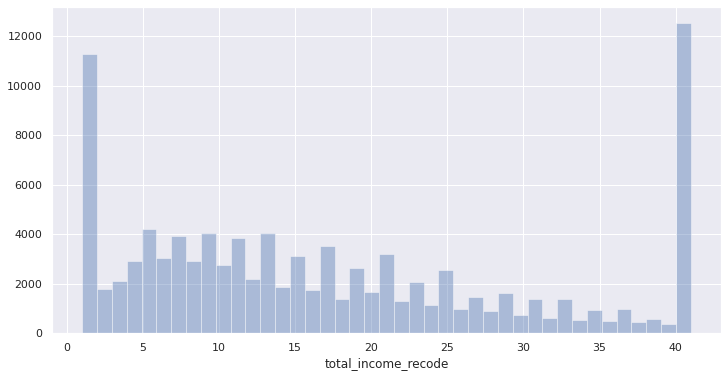

In [ ]:
#plot data as a histogram to spot outliers
#41 bins for 41 data points for better histogram
#kde=False because the line graph is not necessary
plt.figure(figsize=(12,6))
ax = sns.distplot(race['total_income_recode'], bins=(41), kde=False)

We can see that we have 3 big outliers: 0, 1, and 41. Removing them could give us a better distribution.

In [ ]:
#remove 0, 1, and 4 from  total_income_recode
race_0 = race[race['total_income_recode'] != 0]
race_1 = race_0[race_0['total_income_recode'] != 1]
race_clean = race_1[race_1['total_income_recode'] != 41]

In [ ]:
race_clean['total_income_recode'].value_counts()

5     4232
9     4060
13    4056
7     3914
11    3862
17    3545
21    3187
15    3129
6     3033
4     2938
8     2936
10    2744
19    2630
25    2560
12    2183
3     2108
23    2075
14    1878
2     1794
16    1749
20    1660
29    1646
27    1476
18    1401
33    1395
31    1390
22    1303
24    1145
37     991
26     984
35     957
28     907
30     725
32     635
39     579
34     535
36     494
38     476
40     394
Name: total_income_recode, dtype: int64

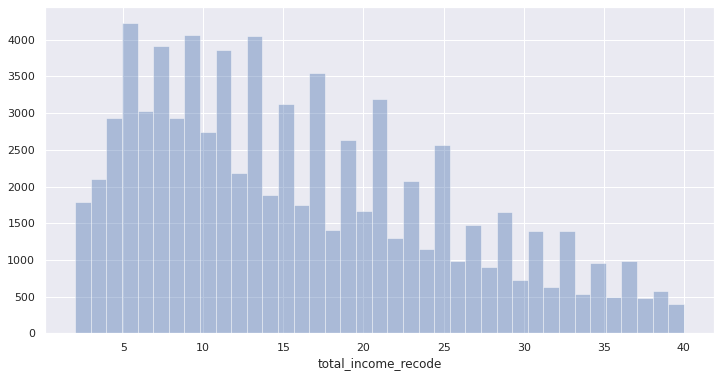

In [ ]:
#plot data again to see distribution
#choose 39 bins because we have 39 data points and this way it looks better
plt.figure(figsize=(12,6))
ax = sns.distplot(race_clean['total_income_recode'], bins=(39), kde=False)

###Testing for Normal Distribution

**1. Shapiro Wilk Test**<br>
Not applicable, because the p-value is not as reliable when n>5000

**2. Kurtosis and Skewness**<br>
General guideline:<br>
* Skewness from -1 to 1 
* Kurtosis from -2 to 2<br>

are acceptable.

In [ ]:
skew(race_clean['total_income_recode'])

0.5983601977681272

In [ ]:
kurtosis(race_clean['total_income_recode'])

-0.5518489484334421

The skewness and kurtosis values fall within the acceptable range.

###Descriptive Statistic and Levene Test for Equal Variances

To see whether an independent-samples t-test is possible, we have to

1. Create two samples
2. Run a descriptive statistic to check whether each sample has a normal distribution
3. Run the Levene test to check whether all input samples are from populations with equal variances.

####1. Create Two Samples

In [ ]:
#create a sample that includes all data for race 1 (White)
race_white = race_clean.iloc[(race_clean['race'] == 1).values]
race_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66900 entries, 0 to 157950
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    66900 non-null  object
 1   race                  66900 non-null  int64 
 2   AGE1                  66900 non-null  int64 
 3   financial_assistance  66900 non-null  int64 
 4   poverty_level         66900 non-null  int64 
 5   health_insurance      66900 non-null  int64 
 6   health_status         66900 non-null  int64 
 7   medicaid_coverage     66900 non-null  int64 
 8   ed_attainment         66900 non-null  int64 
 9   employment_status     66900 non-null  int64 
 10  labor_force_recode    66900 non-null  int64 
 11  total_income_recode   66900 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.6+ MB


In [ ]:
#create a sample that includes all data for race 2 (Black)
race_black = race_clean.iloc[(race_clean['race'] == 2).values]
race_black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10806 entries, 263 to 157676
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10806 non-null  object
 1   race                  10806 non-null  int64 
 2   AGE1                  10806 non-null  int64 
 3   financial_assistance  10806 non-null  int64 
 4   poverty_level         10806 non-null  int64 
 5   health_insurance      10806 non-null  int64 
 6   health_status         10806 non-null  int64 
 7   medicaid_coverage     10806 non-null  int64 
 8   ed_attainment         10806 non-null  int64 
 9   employment_status     10806 non-null  int64 
 10  labor_force_recode    10806 non-null  int64 
 11  total_income_recode   10806 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.1+ MB


In [ ]:
race_white['total_income_recode'].describe()

count    66900.000000
mean        16.198371
std          9.627437
min          2.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         40.000000
Name: total_income_recode, dtype: float64

In [ ]:
race_black['total_income_recode'].describe()

count    10806.000000
mean        13.937720
std          8.973183
min          2.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         40.000000
Name: total_income_recode, dtype: float64

The higher the mean, the higher the income. We can see that the mean for Income for Black is lower than for White.

####2. Descriptive Statistic

Skewness and Kurtosis for race_white

In [ ]:
skew(race_white['total_income_recode'])

0.5603864889771382

In [ ]:
kurtosis(race_white['total_income_recode'])

-0.6080047356304012

*Skewness and Kurtosis are acceptable*

Skewness and Kurtosis for race_black

In [ ]:
skew(race_black['total_income_recode'])

0.8482907416941422

In [ ]:
kurtosis(race_black['total_income_recode'])

-0.0374361308499247

*Skewness and Kurtosis are acceptable*

####3. Levene's Test

H0: The population variances are equal.<br>
HA: The population variances are not equal.

In [ ]:
stat, pvalue = levene(race_white['total_income_recode'], race_black['total_income_recode'])
pvalue

5.1974452969432045e-45

The small p-value suggests that the populations do not have equal variances. This means we cannot use the independent-samples t-test and must switch to a more generalized test free from homoscedasticity assumptions or non-parametric tests. One such test is the Welch's t-test (or unequal variances t-test).

###Welch's t-test

A two-sample location test to test the hypothesis that two populations have equal means. 

Assumptions:

* The independent variable is categorical with at least two levels (groups)
* The dependent variable is continuous, which is measured on an interval or ratio scale
* The distribution of the two groups should follow the normal distribution

Null hypothesis:<br>
H0: The mean of sample 1 is equal to the mean of sample 2<br>

Alternative hypothesis:<br>
HA: The mean of sample 1 is not equal to the mean of sample 2

###Welch's t-test for Race and Income Recode

Null Hypothesis: "The income mean of White is equal to the mean of Black".

Alternative Hypothesis: "The income mean of White is not equal to the mean of Black".

In [ ]:
def welch_ttest(x, y): 
  
  """Welch's t-test: 
      A two-sample location test, which is used to test the hypothesis that two populations have equal means. 
      Used when the populations of the two samples do not have equal variances."""
  
  #Welch-Satterthwaite Degrees of Freedom
  #x = sample 1, y =sample 2
  #1. Numerator: (x variance/x sample size + y variance/y sample size2)**2 
  #2. Denominator: (x variance/x sample size) **2 / (x sample size-1) +(y standard deviation/y sample size2) **2 / (y sample size-1)
  dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
  #by setting equal_var=False we can use the scipy stats.ttest_ind to run a Welch's t-test
  #returns the Welch's t-test and p-value
  t, p = stats.ttest_ind(x, y, equal_var = False)
    
  print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

In [ ]:
welch_ttest(race_white['total_income_recode'], race_black['total_income_recode'])


 Welch's t-test= 24.0485 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 15112.2847


The difference in income between Black and White is significantly different with: <br>
Welch's t(24.05)= 15112.28, p< 0.05<br>
These results suggest that the mean income of White is greater than the mean income of Black.

###Visualization

**Segmenting the Income Data for the Bar Chart Visualization**

As a general rule of thumb, [income data](https://www.census.gov/library/stories/2020/09/was-household-income-the-highest-ever-in-2019.html#:~:text=The%20U.S.%20median%20household%20income,Census%20Bureau%20statistics%20released%20today) from 2019 by the U.S. Census Bureau shows a median household income of ```$68,703```.<br>
Pew defines the middle class as those earning between two-thirds and double the median household income.<br>

```
68703*(2/3)= 45802 --> middle class minimum
68703*2= 137406 --> middle class maximum
```

Taking the Pew classification:<br>
The category of lower-income is made up of people making less than ```$45,802```.<br> 
The category of middle-income is made up of people making between ```$45,802``` and ```$137,406```.<br>
The category of upper-income is made up of people making more than ```$137,406```.

Based on this, the total_income_recode column can be segmented as:<br>
Lower-income = 1-18<br>
Middle-income = 19-40<br>
Upper-income = 41<br>

Because we removed outliers before, there is no 41 in this data. Therefore, we will only look at lower and middle-income segments. There is also no 1 in the data but that does not affect the segmentation.

In [ ]:
#to check which values are present in this specific data set
#can see that 1 or 41 are not present in this data set
race_clean['total_income_recode'].value_counts().sort_index()

2     1794
3     2108
4     2938
5     4232
6     3033
7     3914
8     2936
9     4060
10    2744
11    3862
12    2183
13    4056
14    1878
15    3129
16    1749
17    3545
18    1401
19    2630
20    1660
21    3187
22    1303
23    2075
24    1145
25    2560
26     984
27    1476
28     907
29    1646
30     725
31    1390
32     635
33    1395
34     535
35     957
36     494
37     991
38     476
39     579
40     394
Name: total_income_recode, dtype: int64

In [ ]:
#segment data from 2-18, and 19-40
race_clean['income_segment'] = pd.cut(x=race_clean['total_income_recode'],bins=[2,19,41],labels=['lower-income','mid-income'],right=False)

In [ ]:
#check that the segmentation was done correctly
test = pd.crosstab(race_clean['total_income_recode'], race_clean['income_segment']) 
test.head(40)

income_segment,lower-income,mid-income
total_income_recode,,
2,1794,0
3,2108,0
4,2938,0
5,4232,0
6,3033,0
7,3914,0
8,2936,0
9,4060,0
10,2744,0


In [ ]:
dataframe(race_clean,'income_segment')

#Summary of Findings

Comparing the data for White and Black, we were able to assess that race does have an effect on many factors that seems  to put Black at a disadvantage compared to White.

Black is more likely to be below the poverty level, have poor health, receive Medicaid, have lower educational attainment, and be unemployed. They also tend to have a lower income.

Looking into the dataset of White and Black, the study also found that  those with lower education are more likely to be unemployed and to be close to the poverty level. Those that are closer to the poverty level in turn also have poorer health.

This not only shows the disadvantages the Black community faces when it comes to employment, income, poverty, and health but also how all these factors influence each other.


#Recommendations

Governments and institutions should direct more fundings towards programs that promote the education of Black communities starting not only at a college level but already in school. For more information read this [article](https://www.insidehighered.com/news/2020/10/20/black-students-need-changes-policies-and-structures-beyond-higher-education). Black persons are more likely to have no High School Diploma or only a High School Diploma and this analysis has shown that education affects employment and poverty level, which in turn affects health.

For more immediate relief, funding should also go to organizations that help fight poverty and improve the health of Black communities, such as the [U.S. Department of Health and Human Services Office of Minority Health](https://minorityhealth.hhs.gov).

#Limitations and Further Steps

The biggest issue in the dataset has been the large sample size of the White dataset. In the original dataset White has 122,135 and Black 18,150 rows. In the modified dataset White has 88,082 and Black 13,451 rows. This could also be a critique of the Census dataset, which seems to largely underrepresent races other than White.

This big difference in sample sizes leads to issues with the statistical tests. The Cramér's V for results relating to the White dataset would often imply that the significant chi-square might have been due to the large sample size.

Given more time, the tests should be run again, but with a sample size for White that is closer to the Black sample size, or even better, with a reduced White and Black sample size. That could lead to a more accurate p-value for the chi-square test and a better Cramér's V.

To illustrate this in an example:

In [ ]:
#create a dataset for race 1
race_1 = race[(race['race'].isin([1]))]

In [ ]:
race_1['race'].value_counts()

1    88082
Name: race, dtype: int64

In [ ]:
#create a dataset for 1 with a sample size of 7,000
race_1_sample = race_1.sample(n = 7000)

In [ ]:
race_1_sample['race'].value_counts()

1    7000
Name: race, dtype: int64

In [ ]:
#create a dataset for race 2
race_2 = race[(race['race'].isin([2]))]

In [ ]:
#create a dataset for 2 with a sample size of 7,000
race_2_sample = race_2.sample(n = 7000)

In [ ]:
race_2_sample['race'].value_counts()

2    7000
Name: race, dtype: int64

In [ ]:
#combine both datasets
new_sample = race_1_sample.append(race_2_sample, sort=False)

In [ ]:
new_sample['race'].value_counts()

2    7000
1    7000
Name: race, dtype: int64

**Test** 

Using Financial Assistance, which showed a significant chi-square but low Cramér's V. The Cramér's V implied that the significant chi-square for both White and Black might have been due to sample size.

In [ ]:
#to exclude 0=niu (not in universe)
newsample_finance= new_sample[(new_sample['financial_assistance'].isin([1,2]))]

In [ ]:
#create a crosstab for the chi-square analysis
newsample_finance_crosstab = pd.crosstab(newsample_finance['financial_assistance'],  
                            newsample_finance['race'],
                                margins = False) 

In [ ]:
print(newsample_finance_crosstab)

race                     1     2
financial_assistance            
1                       63    81
2                     6937  6919


In [ ]:
chi_square(newsample_finance_crosstab)

Chi-Square Test
degrees of freedom = 1

Expected frequencies:
 [[  72.   72.]
 [6928. 6928.]]

alpha=0.050, p-value=0.154
p-value > 0.05. Fail to reject H0 that there is no association between the two variables.

Cramer's V for: 
race
1    0.01702
2    0.01702
dtype: float64


Now the chi-square is NOT significant. This underlines the importance of including the Cramér's V in prior analyses and confirms the influence of the sample size on the p-value.